# Phase 1 Project Data Cleaning / EDA

## Business Problem

This is the problem our project is specifying:

`"Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase."`

In this EDA, I do the following:
- Clean the Aviation_Data.csv dataset by:
    - Removing irrelevant measures
    - Removing duplicated records
    - Carefully removing or replacing null values
- Run a few different analyses to determine the lowest risk aircraft

## Importing the Data

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

We had an import issue that Nick solved by specifying the data type for columns 6, 7, and 28.

In [44]:


with open('../data/Aviation_Data.csv', encoding='utf-8') as f:
    dtypes = {'Column6Name': 'str', 'Column7Name': 'str', 'Column28Name': 'str'}
    df = pd.read_csv(f, dtype=dtypes, low_memory=False)

# Now you can work with the DataFrame 'df' as needed


In [45]:
df.head(2)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

Okay, so we've got 90,348 records and 31 columns. Let's clean this up a bit.

## Cleaning the Data

#### Keeping / Removing Columns for These Reasons

Keeping
- Event ID and Accident Number: keeping for now to screen for duplicates in next step*
- Event.Date: might be useful
- Location and Country: might be useful
- Injury Severity, Aircraft Damage: will be useful
- Aircraft Category: Shows many records not involving airplanes, which we can remove later*
- Make and Model: will be useful
- Amateur Built: can probably use to remove from data. About 8.5k out of 90 are listed as amateur built*
- Number of Engines: will need further investigation. Some show 0 engines, most show one. I would imagine we would only be looking at 2+ engine planes for enterprise use*
- Engine Type: useful
- FAR Description: Stands for Federal Aviation Regulation description. Might be useful, so keep for now.*
- Purpose of Flight: useful for determining cause of accident
- Total Injuries columns: useful
- Weather Conditions: will help determine possible cause
- Report Status: May be helpful for us

*Return to these measures for further cleaning

Removing
- Investigation Type: upon doing a .values_count(), we see it is not useful
- Latitude and Longitude: mostly null, also redundant since we have Location (city, state)
- Airport.Code and Airport Name: about half null, also irrelevant to determining safety
- Registration Number: irrelevant
- Schedule: Mostly null, also irrelevant
- Air Carrier: mostly null, aldo irrelevant
- Broad Phase of Flight: Enough null values for a categorical data point that we should exclude
- Publication Date: irrelevant when data was published


In [47]:
df.drop(['Investigation.Type','Latitude', 'Longitude', 'Airport.Code', 
         'Airport.Name', 'Registration.Number', 'Schedule', 'Air.carrier', 
         'Broad.phase.of.flight', 'Publication.Date'], axis=1, inplace=True)

In [48]:
df.head(2)

,Event.Id,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
0,20001218X45444,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,...,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,UNK,Probable Cause
1,20001218X45447,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,...,1.0,Reciprocating,NaN,Personal,4.0,0.0,0.0,0.0,UNK,Probable Cause


In [49]:
df[df['Event.Id'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 64030 to 90097
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                0 non-null      object 
 1   Accident.Number         0 non-null      object 
 2   Event.Date              0 non-null      object 
 3   Location                0 non-null      object 
 4   Country                 0 non-null      object 
 5   Injury.Severity         0 non-null      object 
 6   Aircraft.damage         0 non-null      object 
 7   Aircraft.Category       0 non-null      object 
 8   Make                    0 non-null      object 
 9   Model                   0 non-null      object 
 10  Amateur.Built           0 non-null      object 
 11  Number.of.Engines       0 non-null      float64
 12  Engine.Type             0 non-null      object 
 13  FAR.Description         0 non-null      object 
 14  Purpose.of.flight       0 non-null 

Getting all null values in rows where Event ID is null. Let's drop those records

In [50]:
df.dropna(subset=['Event.Id'], inplace=True)

Time to look for duplicates

In [51]:
# New df containing duplicated Event ID's

#df_duplicates1 = df[df.duplicated(subset=['Event.Id'], keep=False) == True].sort_values('Event.Id')

#df_duplicates1

Looks like we found some misentries. The makes and models of these aircraft are disagreeing for seemingly the same accidents, which has created these duplicate records. Unfortunately, it's impossible for us to tell which record is accurate. To avoid bad data messing with our results, we will need to exclude ALL of these records.

In [52]:
#df.drop_duplicates(subset=['Event.Id'], keep=False, inplace=True)

In [53]:
# Checking our work

#df.duplicated(subset=['Event.Id']).value_counts()

In [54]:
# Let's check along the Accident Number column

#df.duplicated(subset=['Accident.Number']).value_counts()

Looks good. For cleanliness, let's drop the Accident Number column. We can keep the Event ID for indexing and to allow others to check for duplicates.

In [55]:
df.drop(['Accident.Number'], axis=1, inplace=True)

Now let's look at Aircraft Category and exclude any non-airplane records

In [56]:
# These are the records we need to drop

df[(df['Aircraft.Category'] != 'Airplane') & (df['Aircraft.Category'].isna() == False)]

,Event.Id,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
16,20020917X01962,1982-01-02,"MIDWAY, UT",United States,Non-Fatal,Destroyed,Helicopter,Enstrom,280C,No,1.0,Reciprocating,Part 91: General Aviation,Personal,0.0,0.0,0.0,1.0,IMC,Probable Cause
19,20020917X02339,1982-01-02,"MIAMI, FL",United States,Non-Fatal,Substantial,Helicopter,Smith,WCS-222 (BELL 47G),No,1.0,Reciprocating,Part 91: General Aviation,Personal,0.0,0.0,0.0,2.0,VMC,Probable Cause
22,20020917X01657,1982-01-02,"CHAMBLEE, GA",United States,Non-Fatal,Substantial,Helicopter,Bell,206L-1,No,1.0,Turbo Shaft,Part 135: Air Taxi & Commuter,Unknown,0.0,0.0,0.0,1.0,VMC,Probable Cause
46,20020917X02157,1982-01-06,"MAMMOTH LAKES, CA",United States,Non-Fatal,Substantial,Helicopter,Aerospatiale,SA-316B,No,1.0,Turbo Shaft,Part 91: General Aviation,Business,0.0,0.0,0.0,6.0,VMC,Probable Cause
62,20020917X02247,1982-01-09,"CALISTOGA, CA",United States,Non-Fatal,Substantial,Glider,Schleicher,ASW 20,No,0.0,Unknown,Part 91: General Aviation,Personal,0.0,0.0,0.0,1.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90301,20221204106407,2022-12-04,"Beverly, MA",United States,Fatal,Substantial,Gyrocraft,ROTORSPORT UK LTD,CAVALON,No,1.0,NaN,091,Personal,1.0,0.0,0.0,0.0,VMC,NaN
90313,20221209106435,2022-12-07,"Waimea, HI",United States,Minor,Substantial,Helicopter,EUROCOPTER,EC 130 B4,No,1.0,NaN,135,NaN,0.0,1.0,0.0,6.0,NaN,NaN
90315,20221212106442,2022-12-08,"La Sal, UT",United States,Non-Fatal,Substantial,Helicopter,HUGHES,369D,No,1.0,NaN,091,Other Work Use,0.0,0.0,0.0,2.0,VMC,NaN
90322,20221213106449,2022-12-11,"Kildare,",Ireland,NaN,Destroyed,Helicopter,ROBINSON HELICOPTER COMPANY,R44 II,No,1.0,NaN,NUSN,NaN,0.0,0.0,0.0,0.0,NaN,NaN


In [57]:
# Get their indexes and drop

nonplane_indexes = df[(df['Aircraft.Category'] != 'Airplane') 
                      & (df['Aircraft.Category'].isna() == False)].index

df.drop(index=nonplane_indexes, inplace=True)

In [58]:
# Now let's drop that column

df.drop(['Aircraft.Category'], axis=1, inplace=True)

Let's look further into Engine Counts. We can probably drop all records for single engine aircraft, as our company probably will not be using prop planes. But first - what's going on with the 0 engines?

In [59]:
df['Number.of.Engines'].value_counts()

1.0    66360
2.0    10840
0.0      728
3.0      482
4.0      426
8.0        1
6.0        1
Name: Number.of.Engines, dtype: int64

In [60]:
df[df['Number.of.Engines'] == 0]

,Event.Id,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
1505,20020917X03932,1982-06-09,"SHREWSBURY, PA",United States,Non-Fatal,Substantial,Scheicher,K8B,No,0.0,Unknown,NaN,Personal,0.0,0.0,0.0,1.0,VMC,Probable Cause
3606,20001214X42064,1983-01-02,"INDIANOLA, IA",United States,Non-Fatal,NaN,Balloon Works,FIREFLY 7B,No,0.0,Unknown,NaN,Personal,0.0,1.0,0.0,1.0,VMC,Probable Cause
3659,20001214X42066,1983-01-08,"GREENWOOD, MO",United States,Non-Fatal,Substantial,Balloon Works,FIRE FLY 7-B,No,0.0,Unknown,NaN,Instructional,0.0,0.0,0.0,2.0,VMC,Probable Cause
3951,20001214X42143,1983-02-21,"WOODBINE, MD",United States,Non-Fatal,Substantial,Scheibe Flugzeugbau,L SPATZ-55,No,0.0,Unknown,NaN,Personal,0.0,0.0,0.0,1.0,VMC,Probable Cause
4093,20001214X42553,1983-03-12,"BUENA VISTA, PA",United States,Non-Fatal,Substantial,Burkhart Grob,G10Z ASTIR CS,No,0.0,Unknown,NaN,Personal,0.0,0.0,0.0,1.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63301,20070907X01321,2007-09-02,"HUTCHINSON, KS",United States,Non-Fatal,Substantial,Slingsby,Swallow Type T.45,No,0.0,NaN,NaN,Glider Tow,NaN,1.0,NaN,NaN,VMC,Probable Cause
63538,20071029X01673,2007-10-08,"ALBUQUERQUE, NM",United States,Fatal(1),Substantial,Aerostar,S-66A,No,0.0,NaN,NaN,Personal,1.0,2.0,NaN,2.0,VMC,Probable Cause
63634,20071030X01689,2007-10-26,"Salida, CO",United States,Fatal(1),Destroyed,Schempp-hirth,Ventus B/16.6,No,0.0,NaN,NaN,Personal,1.0,NaN,NaN,NaN,VMC,Probable Cause
64890,20080827X01334,2008-07-05,"Beloit, WI",United States,Non-Fatal,Substantial,AB Sportine Aviacija,Genesis 2,No,0.0,NaN,091,Personal,0.0,0.0,0.0,1.0,VMC,The inadequate visual lookout by the driver of...


With a bit of googling, we find that these are gliders and balloons. Exclude!

In [61]:
# Get their indexes and drop

engines_1and0_indexes = df[(df['Number.of.Engines'] == 0) 
                      | (df['Number.of.Engines'] == 1)].index

df.drop(index=engines_1and0_indexes, inplace=True)

Now let's drop any amateur-built planes. We certainly are not in the market for those. 

In [62]:
# Get their indexes and drop

amateur_indexes = df[(df['Amateur.Built'] == 'Yes')].index

df.drop(index=amateur_indexes, inplace=True)

In [63]:
# Now let's drop that column

df.drop(['Amateur.Built'], axis=1, inplace=True)

Where Injury Severity is listed as 'Incident', Aircraft Damage is null or Minor and Injuries are null, zero, or low.

Where Injury Severity is null, Injuries are null, zero, or low. 

Let's drop these records.

In [64]:
df[(df['Injury.Severity'] == 'Incident') | (df['Injury.Severity'].isna())]

,Event.Id,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
79,20020917X01897,1982-01-12,"CHICAGO, IL",United States,Incident,NaN,Lockheed,L-1011,3.0,Turbo Fan,Part 121: Air Carrier,Unknown,0.0,0.0,0.0,149.0,UNK,Probable Cause
80,20020917X01765,1982-01-12,"CLARKSBURG, WV",United States,Incident,Minor,Embraer,EMB-110P1,2.0,Turbo Prop,Part 135: Air Taxi & Commuter,Unknown,0.0,0.0,0.0,2.0,VMC,Probable Cause
119,20020917X01766,1982-01-19,"WASHINGTON, DC",United States,Incident,Minor,De Havilland,DHC-6-300,2.0,Turbo Prop,Part 91: General Aviation,Ferry,0.0,0.0,0.0,1.0,IMC,Probable Cause
131,20020917X02334,1982-01-20,"SAN JOSE, CA",United States,Incident,Minor,Piper,PA-31-350,2.0,Reciprocating,Part 91: General Aviation,Executive/corporate,0.0,0.0,0.0,2.0,VMC,Probable Cause
149,20020917X01767,1982-01-22,"LOUISVILLE, KY",United States,Incident,NaN,Dassault/sud,FALCON 20,2.0,Turbo Fan,Part 121: Air Carrier,Unknown,0.0,0.0,0.0,2.0,VMC,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90321,20221212106440,2022-12-11,"Fox Island, NY",United States,NaN,NaN,ROBINSON HELICOPTER,R22 BETA,NaN,NaN,091,Instructional,0.0,0.0,0.0,0.0,NaN,NaN
90333,20221215106462,2022-12-15,"Patterson, LA",United States,NaN,NaN,BELL,206-L4,NaN,NaN,135,NaN,0.0,0.0,0.0,0.0,NaN,NaN
90338,20221219106472,2022-12-18,"Kahului, HI",United States,NaN,NaN,AIRBUS,A330-243,NaN,NaN,121,NaN,0.0,0.0,0.0,0.0,NaN,NaN
90344,20221227106494,2022-12-26,"Hampton, NH",United States,NaN,NaN,BELLANCA,7ECA,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN


In [65]:
# Get their indexes and drop

incident_null_indexes = df[(df['Injury.Severity'] == 'Incident') | (df['Injury.Severity'].isna())].index

df.drop(index=incident_null_indexes, inplace=True)

Let's drop records where Make or Model are null

In [66]:
null_make_model_index = df[(df['Make'].isna()) | (df['Model'].isna())].index

df.drop(index=null_make_model_index, inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14028 entries, 4 to 90347
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                14028 non-null  object 
 1   Event.Date              14028 non-null  object 
 2   Location                14004 non-null  object 
 3   Country                 13961 non-null  object 
 4   Injury.Severity         14028 non-null  object 
 5   Aircraft.damage         12671 non-null  object 
 6   Make                    14028 non-null  object 
 7   Model                   14028 non-null  object 
 8   Number.of.Engines       9923 non-null   float64
 9   Engine.Type             11048 non-null  object 
 10  FAR.Description         5177 non-null   object 
 11  Purpose.of.flight       10720 non-null  object 
 12  Total.Fatal.Injuries    12370 non-null  float64
 13  Total.Serious.Injuries  11888 non-null  float64
 14  Total.Minor.Injuries    11763 non-null

Now with cleaner data set I can wrap my head around some potential questions. In general, I'd like to know which Makes, Models, Engine Counts, and Engine Types are most/least involved in accidents, which I would like to measure by Injury Severity, Aircraft Damage, and Fatal and Serious Injury count.

Before going further, I'd like to try to fill in some null values for Engine Count and Engine Type by making a dictionary of existing counts and types by Model. Let's see if it works.

In [68]:
# Starting number

df['Number.of.Engines'].count()

9923

In [69]:
# Creating a dictionary using Model as keys and Number of Engines (non-null) as values

engine_count_dict = df[(df['Number.of.Engines'].isna() == 
                        False)].set_index('Model')['Number.of.Engines'].to_dict()

In [70]:
# Using this dictionary to fill in some null values in Number of Engines

df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Model'].map(engine_count_dict))

In [71]:
# Ending number. Got another 1500!

df['Number.of.Engines'].count()

11457

Now let's do this for Engine Type.

In [72]:
# Starting number

df['Engine.Type'].count()

11048

In [73]:
# {Model: Engine Type}, then use to fill in nulls. Got another 2000!

engine_type_dict = df[(df['Engine.Type'].isna() == 
                        False)].set_index('Model')['Engine.Type'].to_dict()

df['Engine.Type'] = df['Engine.Type'].fillna(df['Model'].map(engine_type_dict))

df['Engine.Type'].count()

13171

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14028 entries, 4 to 90347
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                14028 non-null  object 
 1   Event.Date              14028 non-null  object 
 2   Location                14004 non-null  object 
 3   Country                 13961 non-null  object 
 4   Injury.Severity         14028 non-null  object 
 5   Aircraft.damage         12671 non-null  object 
 6   Make                    14028 non-null  object 
 7   Model                   14028 non-null  object 
 8   Number.of.Engines       11457 non-null  float64
 9   Engine.Type             13171 non-null  object 
 10  FAR.Description         5177 non-null   object 
 11  Purpose.of.flight       10720 non-null  object 
 12  Total.Fatal.Injuries    12370 non-null  float64
 13  Total.Serious.Injuries  11888 non-null  float64
 14  Total.Minor.Injuries    11763 non-null

In [75]:
df[(df['Injury.Severity'] != 'Non-Fatal') & (df['Total.Fatal.Injuries'].isna())]

,Event.Id,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status
41240,20010711X01373,1997-02-08,"NURNBERG/GERF, Germany",Germany,Unavailable,NaN,Boeing,B-737-300,2.0,Turbo Fan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Foreign
41339,20010711X01374,1997-03-07,"MEDELLIN, Central African Republic",Central African Republic,Unavailable,NaN,Cessna,Citation 500,2.0,Turbo Fan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Foreign
41656,20001208X07697,1997-04-27,"JINAN, CHINA",China,Unavailable,Substantial,Mcdonnell Douglas,MD-82,2.0,Unknown,"Non-U.S., Commercial",Unknown,NaN,NaN,NaN,NaN,UNK,Foreign
42287,20001208X08352,1997-07-21,"SOUTHERN THAILA, Thailand",Thailand,Unavailable,Destroyed,Learjet,LR-31,NaN,Unknown,Part 129: Foreign,Unknown,NaN,NaN,NaN,NaN,UNK,Foreign
42847,20001208X08992,1997-10-09,"HARBIN, CHINA",China,Unavailable,Substantial,Cessna,650-0220,NaN,Unknown,"Non-U.S., Non-Commercial",Unknown,NaN,NaN,NaN,NaN,UNK,Foreign
43692,20010711X01369,1998-04-12,"ALMATY, Kazakhstan",Kazakhstan,Unavailable,NaN,Boeing,B-737-200,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Foreign
44014,20001211X10045,1998-05-29,"BOMBAY, INDIA",India,Unavailable,Substantial,Boeing,B-737-500,NaN,Unknown,Part 129: Foreign,Unknown,NaN,NaN,NaN,NaN,UNK,Foreign
44608,20001211X10826,1998-08-05,"SEOUL, KOREA, REPUBLIC OF","Korea, Republic Of",Unavailable,Substantial,Boeing,747-400,4.0,Unknown,"Non-U.S., Commercial",Unknown,NaN,NaN,NaN,NaN,IMC,Foreign
45560,20001204X00045,1999-01-28,"NAPLES, ITALY",Italy,Unavailable,Substantial,Mcdonnell Douglas,MD-82,2.0,Unknown,Part 129: Foreign,Unknown,NaN,NaN,NaN,NaN,UNK,Foreign
45711,20001205X00299,1999-03-04,"BIARRITZ, FRANCE",France,Unavailable,Substantial,Boeing,737-228,NaN,Unknown,Part 129: Foreign,Unknown,NaN,NaN,NaN,NaN,IMC,Foreign


In [76]:
df['Report.Status'].value_counts()

Probable Cause                                                                                                                                                                                                                                                                                                               8027
Foreign                                                                                                                                                                                                                                                                                                                      1393
<br /><br />                                                                                                                                                                                                                                                                                                                  101
Factual                           

In [85]:
df['Weather.Condition'].value_counts()

VMC    9458
IMC    2018
UNK     267
Unk     112
Name: Weather.Condition, dtype: int64

In [98]:
df['Purpose.of.flight'].value_counts().head(50)



Personal                     4351
Unknown                      2436
Business                     1118
Instructional                 872
Positioning                   625
Executive/corporate           409
Ferry                         250
Public Aircraft               147
Other Work Use                145
Aerial Application            115
Aerial Observation             76
Flight Test                    68
Skydiving                      40
Public Aircraft - Federal      21
Air Race show                  11
Firefighting                   10
Public Aircraft - State         6
External Load                   5
Public Aircraft - Local         5
Air Race/show                   3
Air Drop                        2
Banner Tow                      2
Glider Tow                      2
ASHO                            1
Name: Purpose.of.flight, dtype: int64

In [103]:
country_counts = df['Country'].value_counts()


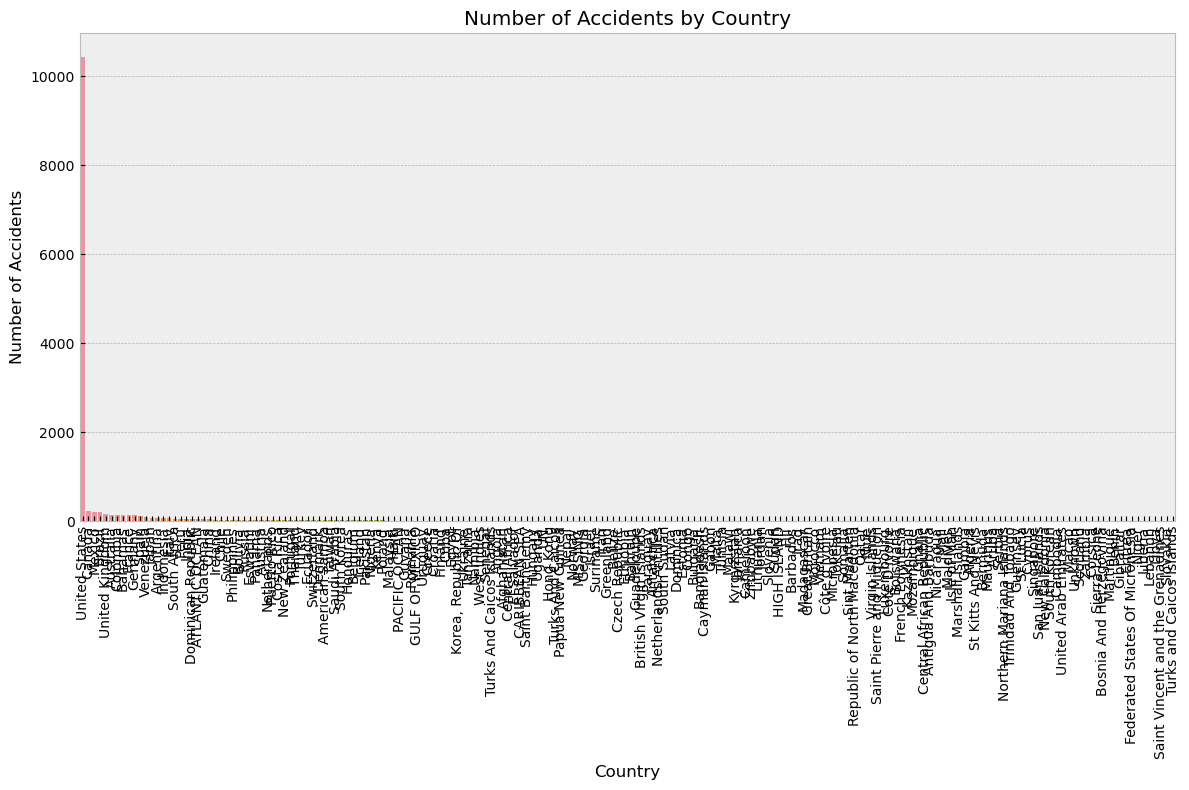

In [101]:


# Assuming your DataFrame is named 'df'

# Count the number of accidents for each country
country_counts = df['Country'].value_counts()

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 8))  # Set the figure size
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Country')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Country')
plt.tight_layout()

# Show the plot
plt.show()


In [104]:
df['Country'].value_counts()


United States                       10440
Canada                                225
Mexico                                203
Brazil                                200
United Kingdom                        167
                                    ...  
Lebanon                                 1
Libya                                   1
Saint Vincent and the Grenadines        1
Slovakia                                1
Turks and Caicos Islands                1
Name: Country, Length: 190, dtype: int64

In [106]:
country_counts.head()

United States     10440
Canada              225
Mexico              203
Brazil              200
United Kingdom      167
Name: Country, dtype: int64

In [107]:
# Assuming your DataFrame is named 'df'

# Create a new column 'Total Passengers Documented' by summing the specified columns
df['Total Passengers Documented'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']

# Now the DataFrame 'df' contains the new column 'Total Passengers Documented'


In [110]:
df['Total Passengers Documented'].head(60)

4       NaN
5       NaN
8       0.0
25      8.0
26      1.0
33      2.0
34      4.0
39      2.0
53      0.0
65      0.0
68      2.0
70      0.0
78      0.0
81      3.0
84     87.0
87      0.0
89      NaN
93      3.0
94      0.0
101     2.0
102     1.0
103     3.0
104     2.0
118     3.0
120     0.0
127     0.0
129     0.0
132     2.0
134     1.0
139     1.0
140     2.0
141     3.0
155    30.0
159     0.0
165     7.0
185     0.0
214     7.0
221     0.0
223     1.0
229     6.0
230     1.0
234     0.0
243     2.0
251     0.0
280     0.0
282     0.0
284     2.0
285     2.0
287     0.0
288     0.0
290     2.0
293     NaN
296     0.0
299     1.0
321     0.0
322     1.0
332     0.0
334     8.0
335     0.0
336     3.0
Name: Total Passengers Documented, dtype: float64

In [112]:
df['Make'].value_counts().head(50)

Cessna                 2247
Piper                  1943
Beech                  1648
CESSNA                  837
Boeing                  643
BOEING                  628
PIPER                   544
BEECH                   456
Mcdonnell Douglas       204
Douglas                 168
Aero Commander          168
Bell                    164
Schweizer               163
AIRBUS                  120
Mitsubishi              119
Swearingen              114
De Havilland            101
EMBRAER                  98
Learjet                  96
Balloon Works            86
Sikorsky                 80
Grumman                  76
Rockwell                 74
Lockheed                 72
Embraer                  70
Aerospatiale             67
Let                      62
Airbus Industrie         62
Robinson                 62
Aerostar                 59
BOMBARDIER INC           57
Gates Learjet            56
Fairchild                55
Mbb                      52
Burkhart Grob            52
MCDONNELL DOUGLAS   